In [2]:
# urlopen이라는 함수를 사용해서 scraping을 하였다. 하지만 이 함수는 한글을 불러올 때 에러가 발생

import requests # from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
from datetime import datetime
import time
import re

<br>
<br>

## 1. 뉴스 검색 결과에서 네이버뉴스 추려내기

In [2]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query

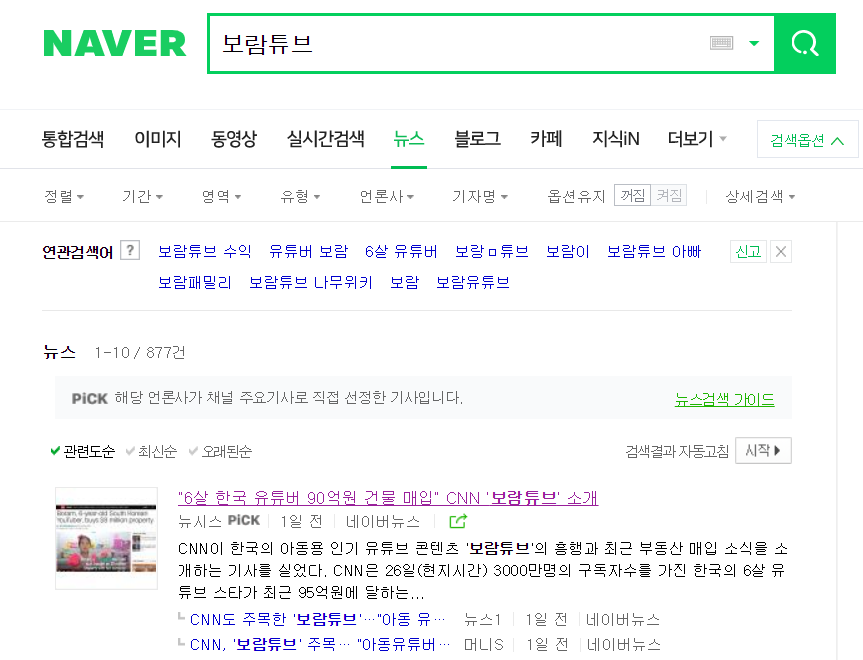

In [9]:
# from urllib.request import urlopen
# web = urlopen(url)
# print(web)

In [10]:
#web = requests.get(url).content
#print(web)

In [11]:
# HTTP == HyperText Transfer Protocol
# HTTP Request & Response

# HTTP Request -> GET, POST, PUT, DELETE 등
# HTTP Response -> G

web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

#print(source) # source를 그대로 출력할 경우, 담고 있는 텍스트가 무척 많아서 버벅이게 될 수 있습니다.

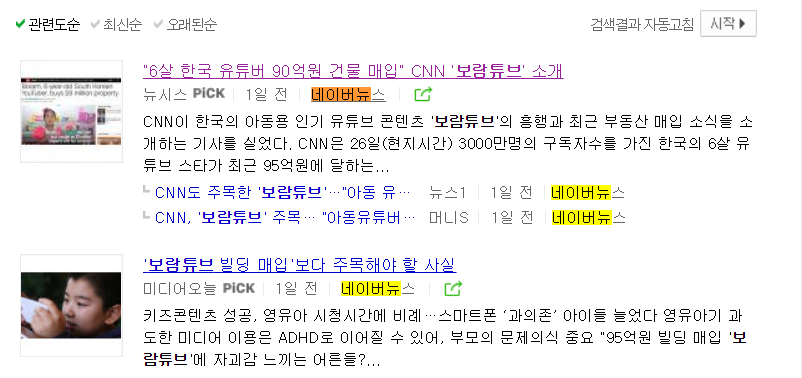

In [14]:
news_subjects = source.find_all('a', {'class' : '_sp_each_title'}) # ResultSet (리스트와 유사한 형태)
news_subjects

[<a class="_sp_each_url _sp_each_title" href="http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver" onclick="return goOtherCR(this, 'a=nws*f.tit&amp;r=1&amp;i=8813C2F5_000000000000000000050830&amp;g=5253.0000050830&amp;u='+urlencode(this.href));" target="_blank" title="[줍줍]제 2의 보람튜브? 꿈 깨세요">[줍줍]제 2의 <strong class="hl">보람튜브</strong>? 꿈 깨세요</a>,
 <a class="_sp_each_title" href="http://news.kbs.co.kr/news/view.do?ncd=4340352&amp;ref=A" onclick="return goOtherCR(this, 'a=nws*e.tit&amp;r=2&amp;i=88000114_000000000000000010771978&amp;g=056.0010771978&amp;u='+urlencode(this.href));" target="_blank" title="“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’">“유치원에서 유<strong class="hl">튜브</strong> 가르쳐요” 초등생 장래희망 3위 ‘유튜버’</a>,
 <a class="_sp_each_title" href="http://www.segye.com/content/html/2019/12/06/20191206510151.html?OutUrl=naver" onclick="return goOtherCR(this, 'a=nws*j.tit&amp;r=3&amp;i=880000D2_000000000000000003420297&amp;g=022.0003420297&amp;u='+urlencode(this.href));" target="_blank" tit

In [15]:
# 네이버에서 "보람튜브"를 검색한 후 뉴스 탭의 1번째 페이지(위 url 변수의 URL에 해당)에 나타나 있는 뉴스들의 "제목"을 크롤링해주세요. 
# 텍스트만 뽑아내어 하나의 리스트로 모아 저장해주세요. (ex. 위 스크린샷에서 ["6살 한국 유튜버 90억원 건물 매입" CNN '보람튜브' 소개])

news_subjects = source.find_all('a', {'class' : '_sp_each_title'}) # ResultSet (리스트와 유사한 형태)

subject_list = []

for subject in news_subjects:
    subject_list.append(subject.get_text())

print(subject_list)

['[줍줍]제 2의 보람튜브? 꿈 깨세요', '“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’', '돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]', "'미디어 시장 장악'… 유튜브의 3가지 성공비결", "보람패밀리 '보람튜브' 최다 구독자 보유 키즈 인기 채널 등극", "보람패밀리, '보람튜브' 3천만명에 이르는 구독자..그 인기 비결은?", '롯데월드 아쿠아리움 X 보람튜브 콜라보 영상 공개', '주렁주렁X보람튜브 콜라보, 주렁주렁송과 함께 선보여', '‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?', "'보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익"]


In [23]:
urls = news_subjects
first_article = urls[0]
first_article.attrs # tag's attributes (== attrs)
#first_article.get_text()

{'href': 'http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver',
 'target': '_blank',
 'class': ['_sp_each_url', '_sp_each_title'],
 'onclick': "return goOtherCR(this, 'a=nws*f.tit&r=1&i=8813C2F5_000000000000000000050830&g=5253.0000050830&u='+urlencode(this.href));",
 'title': '[줍줍]제 2의 보람튜브? 꿈 깨세요'}

In [24]:
first_article.attrs['href'] # tag의 attribute 'href'의 value 꺼내기

'http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver'

In [26]:
for urls in source.find_all('a', {'class' : "_sp_each_title"}):
    print(urls.attrs['href'])

http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver
http://news.kbs.co.kr/news/view.do?ncd=4340352&ref=A
http://www.segye.com/content/html/2019/12/06/20191206510151.html?OutUrl=naver
http://www.sisaweek.com/news/articleView.html?idxno=128831
http://www.woodkorea.co.kr/news/articleView.html?idxno=35601
http://www.woodkorea.co.kr/news/articleView.html?idxno=35139
http://newsbrite.net/129512
http://www.woodkorea.co.kr/news/articleView.html?idxno=33697
http://www.donga.com/news/article/all/20191001/97682290/1
https://news.imaeil.com/Culture/2019102521261894434


In [37]:
for urls in source.find_all('a', {'class':'_sp_each_url'}):
    print(urls.attrs['href'])

http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003420297
http://www.sisaweek.com/news/articleView.html?idxno=128831
http://www.woodkorea.co.kr/news/articleView.html?idxno=35601
http://www.woodkorea.co.kr/news/articleView.html?idxno=35139
http://newsbrite.net/129512
http://www.woodkorea.co.kr/news/articleView.html?idxno=33697
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003244589
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=088&aid=0000617683


In [39]:
# 사이트마다 html의 태그 구현이 다르다.
# 특정 사이트를 골라서 if 문을 사용하여 그에 맞는 스크레이핑 소스를 만들어서 실행하면 된다.

for urls in source.find_all('a', {'class':'_sp_each_url'}):
    print(urls['href'])
    
# "_sp_each_title"과 "_sp_each_url" 이 동시에 있으면 둘 다 읽어온다.

http://news.bizwatch.co.kr/article/consumer/2019/12/13/0001/naver
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003420297
http://www.sisaweek.com/news/articleView.html?idxno=128831
http://www.woodkorea.co.kr/news/articleView.html?idxno=35601
http://www.woodkorea.co.kr/news/articleView.html?idxno=35139
http://newsbrite.net/129512
http://www.woodkorea.co.kr/news/articleView.html?idxno=33697
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003244589
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=088&aid=0000617683


In [45]:
sentence='multicampus is good'
#sentence.upper().strip()
sentence.startswith('multi')  # sentence.endswith('good')


True

In [46]:
sample_url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=014&aid=0004286058'
sample_url.startswith('https://news.naver.com/')

True

In [47]:
urls_list = []

for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"): # starts with ~~~
        urls_list.append(urls["href"])

urls_list

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003420297',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003244589',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=088&aid=0000617683']

<br>
<br>

## 2. 단일 뉴스 페이지 분석하기

In [51]:
print(urls_list[0])

https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978


1. 제목
2. 날짜&시간
3. 본문
4. 뉴스 url
5. 언론사

#### 정보를 얻어서 DataFrame으로 만든다.

In [50]:
web_news = requests.get(urls_list[0]).content
source_news = BeautifulSoup(web_news, 'html.parser')

<br>
<br>

## 1) 기사 제목 & 발행 날짜

In [54]:
title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
print(title)

“유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’


In [65]:
date = source_news.find('span', {'class' : 't11'}).get_text()
date

#date = date.replace(" ","")

#date1 = date[:11] # 날짜까지 파싱
#date2 = date[13:] # 시간부분 파싱
#date3 = (lambda x : 'am' if x == '오전' else 'pm')(date[11:13])
#date4 = date1 + date2 + date3
#date = pd.Timestamp(date4)   # Timestamp 함수 (정해진 규칙으로 날짜, 시간으로 변경)

#print(date)

'2019.12.10. 오후 5:17'

In [ ]:
# random_func = lambda x : 'am' if x == '오전' else 'pm'

In [ ]:
# def random_func(x):
#     if x == '오전':
#         return 'am'
#     else:
#         return 'pm'

<br>
<br>

## 2) 기사 본문

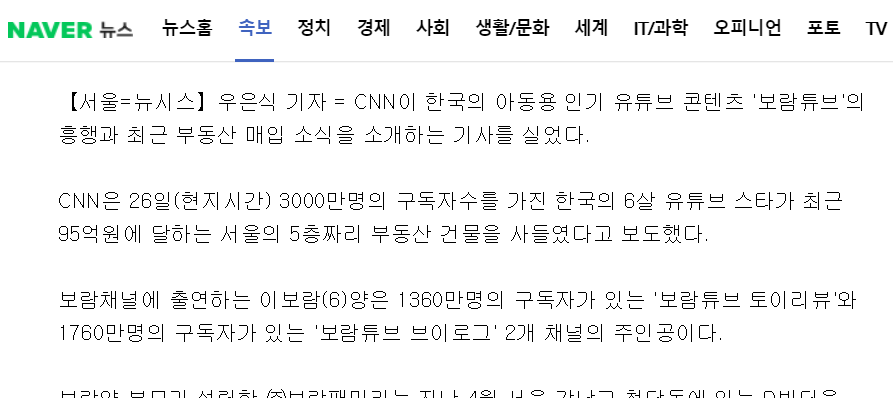

In [66]:
# ArticleBodyContents -> CamelCase (Python에서는 보통 클래스명에만 사용)
# article_body_contents -> snake_case

article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
article
# print(article)

'\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n "그런 거 해서 입에 풀칠이나 하겠냐고..." "야, 뭐시냐 그 개인방송인지 뭔지 골방에 쳐박혀서 맨날 그것만 하고 있는 겨? 언제 그런 거 해서 입에 풀칠이나 하겠느냐고, 어?"최근 방영 중인 한 자동차 광고 내용 중 일부입니다. 고향 집에 오고 있는 아들에게 어머니가 전화를 걸어 이런 잔소리를 하는 건데요. 실제 이런 어머니가 계신다면 이렇게 얘기해드리고 싶네요.\'어머니, 입에 풀칠 정도가 아니라 건물을 사던데요?\'수천만 명이라는 엄청난 구독자를 보유한 유튜브 채널 \'보람튜브\'의 경우, 6살의 보람양이 콘텐츠 크리에이터로 활약하며 \'키즈 유튜브 크리에이터\' 시대를 열었다는 평가도 있었습니다. 유튜브 채널 ‘보람튜브’ 캡처 월수익만 평균 20억 원 대, 최근에는 보람튜브의 가족 회사 \'보람패밀리\'가 청담동에 95억 원대 빌딩을 매입해서 화제가 되기도 했죠. 이런 이유들 때문일까요? 오늘(10일) 발표된 정부의 학생 장래희망 직업 순위 결과가 눈길을 끕니다.\'크리에이터\', 가수·의사·경찰·프로게이머까지 제치고 초등생 장래희망 3위 등극!교육부와 한국직업능력개발원은 전국 1,200개 초·중·고교생 24,000여 명과 학부모, 교원들을 대상으로 \'초·중등 진로교육 현황조사\' 결과 희망직업 순위를 발표했는데요.  초등학생 희망직업 1위는 지난해에 이어 올해도 운동선수로 11.6%를 차지했습니다. 항상 상위권에 있던 교사는 재작년까지는 1위를 유지했지만, 지난해에 2위로 밀렸고 올해도 6.9%, 2위를 차지했습니다.그런데 역시 눈에 띄는 것은 3위에 오른 \'크리에이터\'이지요? 유튜버나 BJ를 일컫는 용어로, 초등생 응답자의 5.7%가 크리에이터를 선호했습니다.유튜버라는 직업은 지난해 조사에서 5위에 등극해 처음으로 10위권에 들었는데요, 이번에는 두 계단 껑충 뛴 3위를 차지한 겁니다."유치원에서도 유튜

In [67]:
article = article.replace("\n", "") # 교체하다
article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
article = article.replace("동영상 뉴스       ", "")
article = article.strip()
article

'"그런 거 해서 입에 풀칠이나 하겠냐고..." "야, 뭐시냐 그 개인방송인지 뭔지 골방에 쳐박혀서 맨날 그것만 하고 있는 겨? 언제 그런 거 해서 입에 풀칠이나 하겠느냐고, 어?"최근 방영 중인 한 자동차 광고 내용 중 일부입니다. 고향 집에 오고 있는 아들에게 어머니가 전화를 걸어 이런 잔소리를 하는 건데요. 실제 이런 어머니가 계신다면 이렇게 얘기해드리고 싶네요.\'어머니, 입에 풀칠 정도가 아니라 건물을 사던데요?\'수천만 명이라는 엄청난 구독자를 보유한 유튜브 채널 \'보람튜브\'의 경우, 6살의 보람양이 콘텐츠 크리에이터로 활약하며 \'키즈 유튜브 크리에이터\' 시대를 열었다는 평가도 있었습니다. 유튜브 채널 ‘보람튜브’ 캡처 월수익만 평균 20억 원 대, 최근에는 보람튜브의 가족 회사 \'보람패밀리\'가 청담동에 95억 원대 빌딩을 매입해서 화제가 되기도 했죠. 이런 이유들 때문일까요? 오늘(10일) 발표된 정부의 학생 장래희망 직업 순위 결과가 눈길을 끕니다.\'크리에이터\', 가수·의사·경찰·프로게이머까지 제치고 초등생 장래희망 3위 등극!교육부와 한국직업능력개발원은 전국 1,200개 초·중·고교생 24,000여 명과 학부모, 교원들을 대상으로 \'초·중등 진로교육 현황조사\' 결과 희망직업 순위를 발표했는데요.  초등학생 희망직업 1위는 지난해에 이어 올해도 운동선수로 11.6%를 차지했습니다. 항상 상위권에 있던 교사는 재작년까지는 1위를 유지했지만, 지난해에 2위로 밀렸고 올해도 6.9%, 2위를 차지했습니다.그런데 역시 눈에 띄는 것은 3위에 오른 \'크리에이터\'이지요? 유튜버나 BJ를 일컫는 용어로, 초등생 응답자의 5.7%가 크리에이터를 선호했습니다.유튜버라는 직업은 지난해 조사에서 5위에 등극해 처음으로 10위권에 들었는데요, 이번에는 두 계단 껑충 뛴 3위를 차지한 겁니다."유치원에서도 유튜브 크리에이터 수업을 하는데요. 뭘"인기 선호 직업으로 꼽히는 만큼 교육 문의도 많다고 합니다. 전국에 수많은 유튜브, 크리에이터 전문 교육

In [69]:
#article

In [94]:
# # (Appendix) 불필요한 기호와 기자 이메일 주소 등 삭제하기 

news_contents = article

pattern = re.compile(r'[\s\Wa-zA-Z0-9]*@') # [white-space, anti-alphanumeric, lower/upper, numeric] 중에서 0 or more + "@"
email_address = pattern.search(article)

print(email_address)
# print(email_address.start())
# print(news_contents[:email_address.start()])

<re.Match object; span=(2089, 2096), match=' (okok@'>


# 정규표현식 상세 설명 @ http://j.mp/2PzgFO8

In [95]:
# 1) "\'" 기호 삭제하기 
pattern = re.compile(r'\'') 
news_contents = pattern.sub('', news_contents)

# 2) 기자 이메일 주소부터 그 이후 전체 삭제하기
pattern = re.compile(r'[\s\Wa-zA-Z0-9]*@')  # 정규표현식 상세 설명 @ http://j.mp/2PzgFO8
email_address = pattern.search(news_contents)
email_address.start()

news_contents = news_contents[:email_address.start()]




print(news_contents)

"그런 거 해서 입에 풀칠이나 하겠냐고..." "야, 뭐시냐 그 개인방송인지 뭔지 골방에 쳐박혀서 맨날 그것만 하고 있는 겨? 언제 그런 거 해서 입에 풀칠이나 하겠느냐고, 어?"최근 방영 중인 한 자동차 광고 내용 중 일부입니다. 고향 집에 오고 있는 아들에게 어머니가 전화를 걸어 이런 잔소리를 하는 건데요. 실제 이런 어머니가 계신다면 이렇게 얘기해드리고 싶네요.어머니, 입에 풀칠 정도가 아니라 건물을 사던데요?수천만 명이라는 엄청난 구독자를 보유한 유튜브 채널 보람튜브의 경우, 6살의 보람양이 콘텐츠 크리에이터로 활약하며 키즈 유튜브 크리에이터 시대를 열었다는 평가도 있었습니다. 유튜브 채널 ‘보람튜브’ 캡처 월수익만 평균 20억 원 대, 최근에는 보람튜브의 가족 회사 보람패밀리가 청담동에 95억 원대 빌딩을 매입해서 화제가 되기도 했죠. 이런 이유들 때문일까요? 오늘(10일) 발표된 정부의 학생 장래희망 직업 순위 결과가 눈길을 끕니다.크리에이터, 가수·의사·경찰·프로게이머까지 제치고 초등생 장래희망 3위 등극!교육부와 한국직업능력개발원은 전국 1,200개 초·중·고교생 24,000여 명과 학부모, 교원들을 대상으로 초·중등 진로교육 현황조사 결과 희망직업 순위를 발표했는데요.  초등학생 희망직업 1위는 지난해에 이어 올해도 운동선수로 11.6%를 차지했습니다. 항상 상위권에 있던 교사는 재작년까지는 1위를 유지했지만, 지난해에 2위로 밀렸고 올해도 6.9%, 2위를 차지했습니다.그런데 역시 눈에 띄는 것은 3위에 오른 크리에이터이지요? 유튜버나 BJ를 일컫는 용어로, 초등생 응답자의 5.7%가 크리에이터를 선호했습니다.유튜버라는 직업은 지난해 조사에서 5위에 등극해 처음으로 10위권에 들었는데요, 이번에는 두 계단 껑충 뛴 3위를 차지한 겁니다."유치원에서도 유튜브 크리에이터 수업을 하는데요. 뭘"인기 선호 직업으로 꼽히는 만큼 교육 문의도 많다고 합니다. 전국에 수많은 유튜브, 크리에이터 전문 교육 기관 중 한 곳에 문의해봤습니다.해당 기관 관계자는

<br>
<br>

## 3) 기사 발행 언론사

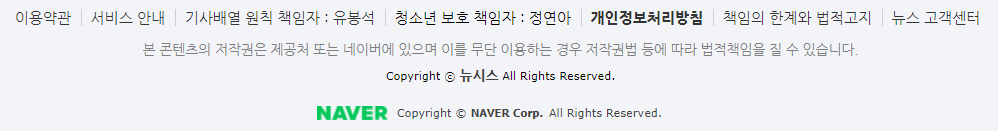

In [96]:
press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
print(press_company)

KBS


<br>
<br>

## 3-1. 여러 뉴스 데이터 모으기

In [9]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []

for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

urls_list

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=056&aid=0010771978',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003420297',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003244589',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=088&aid=0000617683']

In [4]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)

titles = []
dates = []
articles = []
article_urls = []
press_companies = []

In [5]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

# 1) 네이버 뉴스만 추려내기
urls_list = []
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])
        
###################

for url in urls_list: # url는 "네이버 뉴스" URL 
    
    web_news = requests.get(url).content
    source_news = BeautifulSoup(web_news, 'html.parser')

    # 2) 기사 제목 
    title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
    titles.append(title)
    print('Processing article : {}'.format(title))
    
    # 3) 기사 날짜
    date = source_news.find('span', {'class' : 't11'}).get_text()
    dates.append(date)

    # 4) 기사 본문
    article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
    article = article.replace("\n", "")
    article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
    article = article.replace("동영상 뉴스       ", "")
    article = article.strip()
    articles.append(article)
    
    # 5) 기사 URL 
    article_urls.append(url)
    
    # 6) 기사 발행 언론사
    press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
    press_companies.append(press_company)

Processing article : “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’
Processing article : 돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]
Processing article : ‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?
Processing article : '보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익


In [10]:
# 결과 체크 

print(press_companies)

['KBS', '세계닷컴', 'donga.com', '매일신문']


In [25]:
print(datetime.now())
print(datetime.now().strftime('%y%m%d_%H%M')) # string format time

2019-12-13 14:07:13.235952
191213_1407


In [20]:
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

In [26]:
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.

article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
#article_df.to_excel('result.xlsx',index=False) # 맨 앞에 칼럼 index는 만들지 않는다.
article_df.head()

Title                  Date  \
0       “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’   2019.12.10. 오후 5:17   
1       돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]  2019.12.08. 오전 11:36   
2     ‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?   2019.10.01. 오후 6:19   
3  '보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익   2019.10.25. 오후 9:27   

                                             Article  \
0  "그런 거 해서 입에 풀칠이나 하겠냐고..." "야, 뭐시냐 그 개인방송인지 뭔지 ...   
1  논란 부르는 ‘불량 유튜버’ / 구독자 50만명 보유 조폭출신 유튜버 / 지인에 권...   
2  동아일보 DB그동안 ‘아동학대’, ‘불건전한 콘텐츠’라며 논란이 있었던 키즈 유튜버...   
3  국내 TOP20 개인유튜버 구독자 순위, 월 수익 공개 l 안성완 영상기자 asw0...   

                                                 URL PressCompany  
0  https://news.naver.com/main/read.nhn?mode=LSD&...          KBS  
1  https://news.naver.com/main/read.nhn?mode=LSD&...         세계닷컴  
2  https://news.naver.com/main/read.nhn?mode=LSD&...    donga.com  
3  https://news.naver.com/main/read.nhn?mode=LSD&...         매일신문

<br>
<br>

## 3-2. 여러 뉴스 데이터 모으기 (특정 뉴스 웹페이지 크롤링 중 에러 발생 시 회피)

In [27]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

# 1) 네이버 뉴스만 추려내기
urls_list = []

for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

error_list= []
for url in urls_list:
    try:
        web_news = requests.get(url).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        # 2) 기사 제목 
        title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
        print('Processing article : {}'.format(title))

        # 3) 기사 날짜
        date = source_news.find('span', {'class' : 't11'}).get_text()

        # 4) 기사 본문
        article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
        article = article.replace("\n", "")
        article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
        article = article.replace("동영상 뉴스       ", "")
        article = article.strip()
        
        # 5) 기사 발행 언론사
        press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
    
        
        # 위 2~5를 통해 성공적으로 제목/날짜/본문/언론사 정보가 모두 추출되었을 때에만 !!!!!
        # 리스트에 추가해 길이를 동일하게 유지해줍니다.
        
        
        titles.append(title)
        dates.append(date)
        articles.append(article)
        press_companies.append(press_company)
        article_urls.append(url) # 6) 기사 URL 
    
    except:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
        error_list.append(url)

# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모아둡니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

Processing article : “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’
Processing article : 돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]
Processing article : ‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?
Processing article : '보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익


Title                  Date  \
0       “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’   2019.12.10. 오후 5:17   
1       돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]  2019.12.08. 오전 11:36   
2     ‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?   2019.10.01. 오후 6:19   
3  '보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익   2019.10.25. 오후 9:27   
4       “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’   2019.12.10. 오후 5:17   

                                             Article  \
0  "그런 거 해서 입에 풀칠이나 하겠냐고..." "야, 뭐시냐 그 개인방송인지 뭔지 ...   
1  논란 부르는 ‘불량 유튜버’ / 구독자 50만명 보유 조폭출신 유튜버 / 지인에 권...   
2  동아일보 DB그동안 ‘아동학대’, ‘불건전한 콘텐츠’라며 논란이 있었던 키즈 유튜버...   
3  국내 TOP20 개인유튜버 구독자 순위, 월 수익 공개 l 안성완 영상기자 asw0...   
4  "그런 거 해서 입에 풀칠이나 하겠냐고..." "야, 뭐시냐 그 개인방송인지 뭔지 ...   

                                                 URL PressCompany  
0  https://news.naver.com/main/read.nhn?mode=LSD&...          KBS  
1  https://news.naver.com/main/read.nhn?mode=LSD&...         세계닷컴  
2  https://news.naver.com/main/read.nhn?mode=LSD&...    donga.com  
3  https://news.naver.com/main/read.nhn?mode=LSD&...         매일신문  
4  https://news.naver.com/main/read.nhn?mode=LSD&...          KBS

<br>
<br>

## 4. 여러 페이지에 걸쳐 크롤링하기

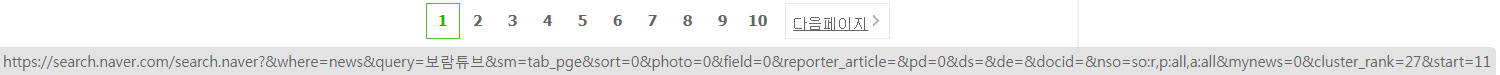

In [33]:
query = '프랑스'
url = "https://search-tour.interpark.com/PC/Result?search=" + query
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

In [ ]:
https://search.naver.com/search.naver
    ?where=news
    &sm=tab_jum
    &query=보람튜브
    &start=  

In [36]:
# page ....
    
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query + '&start=' + str(11) # 2 페이지
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list:
    try:
        web_news = requests.get(url).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
        titles.append(title)
        print(title)
    except:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))

보람튜브 "보람 양 정기적 아동심리 상담 받아.. 학대 없다"
보람튜브, '그것이 알고싶다' 반박…"아동보호 가이드 준수" [전문]
보람튜브 해명 "월 37억 원 수입, 명백하게 과장된 수치"
‘꼬마 유튜버 돈방석’ 이제 옛말? 맞춤광고 금지에 울상
[ONE SHOT] 대한민국 ‘파워 유튜버’…어떤 콘텐트로 얼마나 벌까?
월 37억 벌던 '보람튜브' 광고수입 확 준다
아동학대가 자초한 ‘철퇴’… 인권보호 새 지침 필요
‘보람튜브’ 보람패밀리, 95억 빌딩 매입…月수입 얼마기에?
6세 유튜버 '보람튜브' 가족회사, 95억원 대 강남 빌딩 매입


In [37]:
query = '보람튜브'
url = "https://search.naver.com/search.naver?where=news&query=" + query + '&start=' + str(21) # 3 페이지
web = requests.get(url).content
source = BeautifulSoup(web, 'html.parser')

urls_list = []
for urls in source.find_all('a', {'class' : "_sp_each_url"}):
    if urls["href"].startswith("https://news.naver.com"):
        urls_list.append(urls["href"])

for url in urls_list:
    try:
        web_news = requests.get(url).content
        source_news = BeautifulSoup(web_news, 'html.parser')

        title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
        titles.append(title)
        print(title)
    except:
        print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))

'월 40억 수익' 6세 유튜버 '보람튜브'.. 강남 빌딩 매입
95억 빌딩 산 '보람튜브' 6살 유튜버 가족, 월매출 보니
강남 빌딩 매입한 6살 유튜버 ‘보람튜브’ 광고 수익
'보람튜브' 6살 유튜버 보람이 가족회사, 95억 빌딩 매입…국내 광고수익 1위
6살 유튜버 둔 '보람패밀리', 청담동 5층 건물 95억에 매입
유튜브 수익으로 95억 빌딩 산 보람튜브...과거 아동학대 논란도 재조명 
95억 빌딩 매입 ‘보람튜브’가 뭐길래···광고 수익 1위 채널, 아동학대로 고발 당하기도
"6세 아이가 임신·출산을?" 보람튜브, 도 넘은 콘텐츠로 과거 논란
"아이 이용해 돈벌이" '보람튜브' 과거 아동학대로 고발 당해
95억 빌딩 산 ‘보람튜브’ 아동학대 논란도
6살 유튜버 번 돈으로 95억 빌딩 매입...'보람튜브' 비결은?
95억 강남 빌딩 산 6세 유튜버···'보람튜브' 한달 얼마 벌길래
강남 95억 빌딩 매입한 6세 유튜버 '보람튜브', 인기 이유는?
[생글기자 코너] 유튜브·1인 미디어 시대의 빛과 그림자
"보람튜브, 날로 먹은 것 아냐.. 아무나 유튜브해선 안돼"
"6살 한국 유튜버 90억원 건물 매입" CNN '보람튜브' 소개
[필동정담] "유튜버가 꿈"


In [39]:
query = '보람튜브'
max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [40]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)

titles = []
dates = []
articles = []
article_urls = []
press_companies = []

In [41]:
# current_call = 1
# last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

# while current_call <= last_call:
#     print(current_call) # 1, 11, 21, 31, 41 
#     current_call += 10

# # current_call 1 <= 41
# # current_call 11 <= 41
# # current_call 21 <= 41
# # current_call 31 <= 41
# # current_call 41 <= 41
# # current_call 51 <= 41 <- False & 종료

In [45]:
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call: # 조건문이 참인 "동안" 실행
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query + "&start=" + str(current_call)
    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    error_list = []
    
    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            web_news = requests.get(url).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 't11'}).get_text()

            article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.strip()

            press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            error_list.append(url)
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

if (len(error_list)) > 1:
    print(error_list)
    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()


1번째 기사글부터 크롤링을 시작합니다.
Processing article : “유치원에서 유튜브 가르쳐요” 초등생 장래희망 3위 ‘유튜버’
Processing article : 돈·인기에 취한 유튜버… 탈법·무법 사이 줄타기 [S 스토리]
Processing article : ‘키즈 유튜버’ 봉쇄 나선 유튜브…보람튜브, 대출 상환 빨간 불?
Processing article : '보람튜브 월 19억8천만원' 국내 TOP 20 개인 유튜버 순위·수익

11번째 기사글부터 크롤링을 시작합니다.
Processing article : 보람튜브 "보람 양 정기적 아동심리 상담 받아.. 학대 없다"
Processing article : 보람튜브, '그것이 알고싶다' 반박…"아동보호 가이드 준수" [전문]
Processing article : 보람튜브 해명 "월 37억 원 수입, 명백하게 과장된 수치"
Processing article : ‘꼬마 유튜버 돈방석’ 이제 옛말? 맞춤광고 금지에 울상
Processing article : [ONE SHOT] 대한민국 ‘파워 유튜버’…어떤 콘텐트로 얼마나 벌까?
Processing article : 월 37억 벌던 '보람튜브' 광고수입 확 준다
Processing article : 아동학대가 자초한 ‘철퇴’… 인권보호 새 지침 필요
Processing article : ‘보람튜브’ 보람패밀리, 95억 빌딩 매입…月수입 얼마기에?
Processing article : 6세 유튜버 '보람튜브' 가족회사, 95억원 대 강남 빌딩 매입

21번째 기사글부터 크롤링을 시작합니다.
Processing article : '월 40억 수익' 6세 유튜버 '보람튜브'.. 강남 빌딩 매입
Processing article : 95억 빌딩 산 '보람튜브' 6살 유튜버 가족, 월매출 보니
Processing article : 강남 빌딩 매입한 6살 유튜버 ‘보람튜브’ 광고 수익
Processing article : '보람튜브' 6살 유튜버 보람이 가

TypeError: object of type 'NoneType' has no len()

<br>
<br>

## (Appendix) 날짜 지정하여 크롤링하기

- https://search.naver.com/search.naver?where=news&query=보람튜브&
    
    sm=tab_opt&sort=0&photo=0&field=0&
    reporter_article=&pd=3&
    
    ds=2019.12.01&
    de=2019.12.12&
    docid=&
    nso=so%3Ar%2Cp%3Afrom20191201to20191212%2Ca%3Aall&
    
    mynews=0&
    refresh_start=0&
    related=0

In [66]:
query = '보람튜브'

start_date = '2019.07.28'
end_date = '2019.07.30'

max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [69]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
titles = []
dates = []
articles = []
article_urls = []
press_companies = []


# 주어진 일자를 쿼리에 맞는 형태로 변경해줍니다.
start_date = start_date.replace(".", "")
end_date = end_date.replace(".", "")

# 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call:
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    ### !! multiline !!
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query + "&nso=so%3Ar%2Cp%3Afrom" + start_date + "to" + end_date + "%2Ca%3A&start=" + str(current_call)
    
    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            web_news = requests.get(url).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 't11'}).get_text()

            article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.strip()

            press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()


1번째 기사글부터 크롤링을 시작합니다.
Processing article : 아이의 꿈과 어른의 욕망 사이 ‘키즈 유튜버’
Processing article : 학대 논란까지···도 넘는 어린이 유튜브
Processing article : "월 30억 '보람튜브' 열풍에 사표? 절대 안됩니다"
Processing article : `보람튜브`와 같은 뉴미디어의 광고수익 증가에 따른 방송사의 위기
*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=052&aid=0001324674
*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=022&aid=0003384613
Processing article : ‘미달이’ 김성은 “보람튜브? 부모님 원망하는 건 아니지만…”

11번째 기사글부터 크롤링을 시작합니다.
*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=016&aid=0001563173
Processing article : [김경래의 최강시사] ‘보람튜브’ 논란에 대한 미달이 김성은의 생각
Processing article : "내 개 때린 게 죄?"...아슬아슬 막가는 유튜버
Processing article : "내 개 때린 게 죄?"...아슬아슬 막가는 유튜버
Processing article : 독일 유튜버들, 금속노조와 손잡고 노조설립 추진
Processing article : 동물·아동 학대에 조폭TV까지...유튜브 규제 방안은?

21번째 기사글부터 크롤링을 시작합니다.
Processing article : 독일 유튜버들, 금속노조와 손잡고 노조설립 추진

KeyboardInterrupt: 

<br>
<br>

## (Appendix) 기사 정렬 순서 지정하여 크롤링하기

In [198]:
query = '보람튜브'

sort_type = 1 # 관련도순 = 0  최신순 = 1  오래된순 = 2

max_page = 5 # 크롤링을 원하는 최대 페이지 수 지정

In [ ]:
# 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
titles = []
dates = []
articles = []
article_urls = []
press_companies = []


# 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
current_call = 1
last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 

while current_call <= last_call:
    
    print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))
    
    url = "https://search.naver.com/search.naver?where=news&query=" + query \
          + "&sort=" + str(sort_type) \
          + "&start=" + str(current_call)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    urls_list = []
    for urls in source.find_all('a', {'class' : "_sp_each_url"}):
        if urls["href"].startswith("https://news.naver.com"):
            urls_list.append(urls["href"])

    for url in urls_list:
        try:
            web_news = requests.get(url).content
            source_news = BeautifulSoup(web_news, 'html.parser')

            title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
            print('Processing article : {}'.format(title))

            date = source_news.find('span', {'class' : 't11'}).get_text()

            article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
            article = article.replace("\n", "")
            article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
            article = article.replace("동영상 뉴스       ", "")
            article = article.strip()

            press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()
            
            titles.append(title)
            dates.append(date)
            articles.append(article)
            press_companies.append(press_company)
            article_urls.append(url)
        except:
            print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
            
    # 대량의 데이터를 대상으로 크롤링을 할 때에는 요청 사이에 쉬어주는 타이밍을 넣는 것이 좋습니다.
    time.sleep(5)
    current_call += 10

    
# 각 데이터 종류별 list에 담아둔 전체 데이터를 DataFrame에 모으고 엑셀 파일로 저장합니다.
# 파일명을 result_연도월일_시분.csv 로 지정합니다.
article_df = pd.DataFrame({'Title':titles, 
                           'Date':dates, 
                           'Article':articles, 
                           'URL':article_urls, 
                           'PressCompany':press_companies})

article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
article_df.head()

<br>
<br>

## (Appendix) 깔끔하게 정리하기

In [93]:
def main_crawling(query, start_date, end_date, sort_type, max_page):
    
    if query == '':
        query = '보람튜브'
    if len(start_date) != 10:
        start_date = '2019.07.28'
    if len(end_date) != 10:
        end_date = '2019.07.29'
#    if sort_type ? ? ['0', '1', '2']:
    if sort_type not in ['0', '1' ,'2']:
        sort_type = '0'
    if max_page == '':
        max_page = 5


    # 각 기사들의 데이터를 종류별로 나눠담을 리스트를 생성합니다. (추후 DataFrame으로 모을 예정)
    titles = []
    dates = []
    articles = []
    article_urls = []
    press_companies = []

    # 주어진 일자를 쿼리에 맞는 형태로 변경해줍니다.
    start_date = start_date.replace(".", "")
    end_date = end_date.replace(".", "")

    # 지정한 기간 내 원하는 페이지 수만큼의 기사를 크롤링합니다.
    current_call = 1
    last_call = (max_page - 1) * 10 + 1 # max_page이 5일 경우 41에 해당 


    while current_call <= last_call:

        print('\n{}번째 기사글부터 크롤링을 시작합니다.'.format(current_call))

        url = "https://search.naver.com/search.naver?where=news&query=" + query \
              + "&sort=" + sort_type \
              + "&nso=so%3Ar%2Cp%3Afrom" + start_date \
              + "to" + end_date \
              + "%2Ca%3A&start=" + str(current_call)

        urls_list = []
        try: # 네이버 뉴스 검색결과 페이지 자체에 접근이 불가능할 경우 에러가 발생할 수 있습니다.
            web = requests.get(url).content
            source = BeautifulSoup(web, 'html.parser')

            for urls in source.find_all('a', {'class' : "_sp_each_url"}):
                if urls["href"].startswith("https://news.naver.com"):
                    urls_list.append(urls["href"])
        except:
            print('해당 뉴스 검색 페이지의 네이버 뉴스 링크를 모으는 중 에러가 발생했습니다. : ', url)
        
        if urls_list != []:
            for url in urls_list:
                try: # 특정 뉴스 기사글 하나를 크롤링하는 중 에러가 발생할 수 있습니다.ㄴ
                    web_news = requests.get(url).content
                    source_news = BeautifulSoup(web_news, 'html.parser')

                    title = source_news.find('h3', {'id' : 'articleTitle'}).get_text()
                    print('Processing article : {}'.format(title))

                    date = source_news.find('span', {'class' : 't11'}).get_text()

                    article = source_news.find('div', {'id' : 'articleBodyContents'}).get_text()
                    article = article.replace("\n", "")
                    article = article.replace("// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}", "")
                    article = article.replace("동영상 뉴스       ", "")
                    article = article.strip()

                    press_company = source_news.find('address', {'class' : 'address_cp nclicks(fot.presscr)'}).find('a').get_text()

                    titles.append(title)
                    dates.append(date)
                    articles.append(article)
                    press_companies.append(press_company)
                    article_urls.append(url)
                except:
                    print('\n*** {}번부터 {}번까지의 기사글을 크롤링하는 중 문제가 발생했습니다.'.format(current_call, current_call+9))
                    print('*** 다음 링크의 뉴스를 크롤링하는 중 에러가 발생했습니다 : {}'.format(url))
        else:
            pass

        time.sleep(5)
        current_call += 10
            
            
    article_df = pd.DataFrame({'Title':titles, 
                               'Date':dates, 
                               'Article':articles, 
                               'URL':article_urls, 
                               'PressCompany':press_companies})

    article_df.to_excel('result_{}.xlsx'.format(datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
    
    print('\n크롤링이 성공적으로 완료되었습니다!')
    print('\n크롤링 결과를 다음 파일에 저장하였습니다 : {}'.format(datetime.now().strftime('%y%m%d_%H%M')))

In [95]:
query = input('검색어를 입력해주세요. (ex. 보람튜브) : ')
start_date = input('검색 시작 날짜를 입력해주세요. (형식 : 2019.07.28) : ')
end_date = input('검색 종료 날짜를 입력해주세요. (형식 : 2019.07.29) : ')
sort_type = input('정렬 타입을 입력해주세요 (관련도순 = 0, 최신순 = 1, 오래된순 = 2) : ')
max_page = input('크롤링을 원하는 전체 페이지 수를 입력해주세요. (ex. 5) : ')

if start_date > end_date:
    print('\n시작 날짜는 종료 날짜보다 이후로 지정하실 수 없습니다. 다시 실행해주세요!')
elif max_page == '':
    max_page = 5
    print('\n원하시는 페이지 수가 입력되지 않았습니다. 5 페이지까지만 크롤링을 진행합니다.')
    main_crawling(query, start_date, end_date, sort_type, max_page)
else:
    max_page = int(max_page)
    main_crawling(query, start_date, end_date, sort_type, max_page)

검색어를 입력해주세요. (ex. 보람튜브) : 트럼프
검색 시작 날짜를 입력해주세요. (형식 : 2019.07.28) : 2019.12.02
검색 종료 날짜를 입력해주세요. (형식 : 2019.07.29) : 2019.12.12
정렬 타입을 입력해주세요 (관련도순 = 0, 최신순 = 1, 오래된순 = 2) : 2
크롤링을 원하는 전체 페이지 수를 입력해주세요. (ex. 5) : 50

1번째 기사글부터 크롤링을 시작합니다.
Processing article : “중국 성장률 10~15년내 4.4%로 하락”
Processing article : [사설]친기업 정책이 불러온 '美블프 효과' 안보이나
Processing article : '5% 대 500%' 방위비 전쟁…한미, 인상률 놓고 워싱턴 담판
Processing article : [리셋 코리아] 북한 도발 대처하려면 한·일 안보 협력 절실하다
Processing article : [이하경 칼럼] “재인이 형” “호철이 형”으론 실패한 정권 된다
Processing article : 홍콩선거 후 첫 주말 집회서 격렬 충돌…'2주간 휴전' 끝나(종합2보)

11번째 기사글부터 크롤링을 시작합니다.
Processing article : 창설 70년 위기의 나토…美 일방주의 속 균열 심화
Processing article : "청문회 나와라" 하원 법사위 '최후통첩' 받은 트럼프의 선택은
Processing article : 美상원 “방위비 협상, 한국 높은 기여도 감안해야”
Processing article : 불평등-포퓰리즘 곪아터진 중남미… 성장 멈추자 정권 와르르[인사이드&인사이트]
Processing article : 모두가 달린 문제야 [정미경의 이런 영어 저런 미국]
Processing article : 더 이상 입김 안통하네… 기름의 지배자 OPEC의 눈물
Processing article : “마크롱, 뇌사상태” 에르도안 터키 대통령 막말에 프랑스정부 발끈
Processing article : 홍

Processing article : 유엔 기후회의 COP25, 2일 개막…구테흐스 "자연과 전쟁 끝내야"(종합)

221번째 기사글부터 크롤링을 시작합니다.
Processing article : 美언론 “홍콩 인권법 때문에 미중 무역협상 정지”
Processing article : 방위비 협상팀 미국행…‘또 파행’ vs ‘극적 담판’?
Processing article : [뉴스포커스] 北, '연말시한' 앞두고 잇단 무력시위…북미대화 가능성은?
Processing article : 백악관, 하원 법사위 탄핵청문 불참 통보…"당파적 조사"
Processing article : 멕시코 북부서 경찰·마약 카르텔 총격전…최소 21명 사망

231번째 기사글부터 크롤링을 시작합니다.
Processing article : '혈맹'과 워싱턴·런던서 '방위비 전쟁' 치르는 트럼프의 셈법
Processing article : 美협상단 측근 "미중 무역협상, 홍콩인권법 때문에 답보"
Processing article : 앤드류 양 "탄핵보다 트럼프가 대통령 됐던 이유에 집중해야"
Processing article : 냉전 종식 30년에 미·중·러는 신냉전시대
Processing article : 美협상단 측근 "미중 무역협상, 홍콩인권법 때문에 답보"
Processing article : 방위비 협상 2주만에 재개…美 의회·행정부 ‘온도차’

241번째 기사글부터 크롤링을 시작합니다.
Processing article : “워터게이트보다 ‘우크라 스캔들’ 더 심각”...닉슨·클린턴 탄핵 관여한 의원 ‘작심발언’
Processing article : [US REPORT] ‘방위비 협상’ 들어간 韓美…방위비 협상 실패하면 주한미군 철수?
Processing article : [데스크 칼럼] ‘록키’를 주문했는데 ‘트럼프’가 배송됐어요
Processing article : [Asia오전] 중국 경기 개선 기대에 亞증시 강세
Processing article : 정세현 "美, 北에 


461번째 기사글부터 크롤링을 시작합니다.
Processing article : "선거 이겼지만 뭐가 달라졌나"…다시 감도는 '전운'
Processing article : 트럼프, 나토 방위비 전방위 압박…주한미군 협상도 파장
Processing article : 트럼프는 주한미군을 철수시킬 수 없다
Processing article : 트럼프, '통화 절하' 브라질·아르헨 철강 등 관세 부활
Processing article : 美 트럼프, 브라질, 아르헨산 철강 제품에 관세 부과
Processing article : 안상수, 해리스 미 대사에 "북한과 종전선언 하면 안 돼"

471번째 기사글부터 크롤링을 시작합니다.
Processing article : 나토, 트럼프 압박에 방위비 '인상'…한국 협상엔 악재
Processing article : 나토, 창설 70년만에 가장 크게 흔들린다…'트럼프 때문에'(?)
Processing article : 유엔 구테흐스, "기후 변화에 무릎 꿇어서는 안 돼"
Processing article : 트럼프 "브라질·아르헨 철강·알루미늄에 관세"
Processing article : "미 군함 홍콩 정박 불허"…중국, 홍콩인권법에 반격
Processing article : 중국, 미군 군함 홍콩 입항 불허
Processing article : 트럼프, 미 하원 법사위 ‘탄핵 청문회 불참’ 통보
Processing article : 탄소저감으로 본 기상도…EU 맑음·미국 천둥, 한국은?

481번째 기사글부터 크롤링을 시작합니다.
Processing article : `관세맨` 트럼프 "브라질·아르헨에 철강관세 재부과"…美·中 무역갈등 남미에 불똥
Processing article : 'IS 동급' 취급에 폭주…멕시코 마약 조직 '시청 총격전'
Processing article : 트럼프 "브라질·아르헨티나 철강·알루미늄에 관세 재개하겠다"
Processing article : 방위비 분담금, 한·일관계, 북한 비핵화…

In [106]:
df = pd.read_excel('result_191213_1518.xlsx', encoding='utf-8') 
df.head()
#print(df['Date'])

Title                  Date  \
0             “중국 성장률 10~15년내 4.4%로 하락”  2019.12.02. 오전 12:04   
1         [사설]친기업 정책이 불러온 '美블프 효과' 안보이나  2019.12.02. 오전 12:06   
2  '5% 대 500%' 방위비 전쟁…한미, 인상률 놓고 워싱턴 담판  2019.12.02. 오전 12:06   
3   [리셋 코리아] 북한 도발 대처하려면 한·일 안보 협력 절실하다  2019.12.02. 오전 12:10   
4  [이하경 칼럼] “재인이 형” “호철이 형”으론 실패한 정권 된다  2019.12.02. 오전 12:34   

                                             Article  \
0  리언 골드펠드 JP모간 투자 총괄중국 성장률 떨어져도 내수로 버텨한국은 내년 성장률...   
1  [서울경제] 미국의 최대 쇼핑 시즌인 블랙프라이데이 하루 온라인 쇼핑금액이 74억달...   
2  3~4일 워싱턴서 SMA 4차 협상미국 “동맹 공평분담 책임” 재확인이번에도 노딜 ...   
3  일본 배제한 한·미 협력은 불가능안보 협력에 정치 개입되면 안 돼  홍규덕 전 국방...   
4  문 정부 외교·내치 기능부전 상태대통령은 허위보고에 속지 말고외부 직언 가감없이 듣...   

                                                 URL PressCompany  
0  https://news.naver.com/main/read.nhn?mode=LSD&...    Joins.com  
1  https://news.naver.com/main/read.nhn?mode=LSD&...         서울경제  
2  https://news.naver.com/main/read.nhn?mode=LSD&...    Joins.com  
3  https://news.naver.com/main/read.nhn?mode=LSD&...    Joins.com  
4  https://news.naver.com/main/read.nhn?mode=LSD&...    Joins.com

In [107]:
df['Article']

0      리언 골드펠드 JP모간 투자 총괄중국 성장률 떨어져도 내수로 버텨한국은 내년 성장률...
1      [서울경제] 미국의 최대 쇼핑 시즌인 블랙프라이데이 하루 온라인 쇼핑금액이 74억달...
2      3~4일 워싱턴서 SMA 4차 협상미국 “동맹 공평분담 책임” 재확인이번에도 노딜 ...
3      일본 배제한 한·미 협력은 불가능안보 협력에 정치 개입되면 안 돼  홍규덕 전 국방...
4      문 정부 외교·내치 기능부전 상태대통령은 허위보고에 속지 말고외부 직언 가감없이 듣...
5      '8·31 프린스에드워드역 사건' 3개월 맞아 시위대-경찰 충돌시위대, 화염병 던지...
6      3∼4일 런던서 정상회의…美-유럽 회원국, 방위비 분담 문제 놓고 갈등 동맹국 터키...
7      4일 청문회는 영국 방문中 출석 어려워…백악관, 변호인들 보낼지 고민트럼프 지난달 ...
8      국방수권법안서 “韓 국방비 지출… 美 동맹국중 가장 높은 수준” 평가美행정부는 3일...
9      “경제 살려내라” 중남미 시위 도미노지난달 29일 칠레 수도 산티아고에서 반정부 시...
10     도널드 트럼프 미국 대통령 탄핵조사를 위한 하원 정보위원회의 공개 청문회에 참석한 ...
11     [OPEC의 힘, 왜 약해졌나]- OPEC의 의도, 시장에선 반대로유가 하락 막기 ...
12     터키의 쿠르드정책 비난 마크롱, 지난달 “나토 뇌사 경험” 꼬집자에르도안 “당신부터...
13     지난달 24일 홍콩 구의원 선거에서 범민주 진영이 압승을 거둔 후 처음으로 벌어진 ...
14     文대통령 "금요일에 휴가 내고 주말 동안 김씨 책 3권 내리 읽어"그중 한권인 金·...
15     도널드 트럼프 미국 대통령이 '우크라이나 스캔들'을 둘러싼 청문회 참석 문제를 놓고...
16     [글로벌 테크 기업들, 딥페이크와 전쟁]저커버그 가짜 인터뷰·트럼프 욕하는 오바마…...
17     20일까지 결론 못내면 셧다운 현실화 우려…

In [81]:
input()

a


'a'

In [82]:
age = input("나이를 적어주세요.")
print('나이 x 2는 ', age * 2)

나이를 적어주세요.
나이 x 2는  


In [83]:
age = int(input("나이를 적어주세요."))
print('나이 x 2는 ', age * 2)

나이를 적어주세요.20
나이 x 2는  40
